# STAGE 1

## Import & Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_complete = pd.read_csv("application_train.csv")
df_complete.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Dataframe "df_complete" mengandung terlalu banyak feature (122 kolom) yang dapat mengurangi efektifitas dalam eksplorasi data, sehingga diperlukan pemilihan dan pengurangan jumlah feature untuk melakukan pengolahan data.

In [3]:
df_feature = df_complete[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL','AMT_ANNUITY', 'AMT_CREDIT']]
df_feature.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
0,100002,1,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,202500.0,24700.5,406597.5
1,100003,0,Cash loans,Married,0,House / apartment,Higher education,State servant,270000.0,35698.5,1293502.5
2,100004,0,Revolving loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,67500.0,6750.0,135000.0
3,100006,0,Cash loans,Civil marriage,0,House / apartment,Secondary / secondary special,Working,135000.0,29686.5,312682.5
4,100007,0,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,121500.0,21865.5,513000.0


Dalam dataframe "df_feature" telah dipilih features dengan informasi yang paling signifikan untuk memenuhi Goals project ini.

## Data Exploration

In [4]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   NAME_FAMILY_STATUS   307511 non-null  object 
 4   CNT_CHILDREN         307511 non-null  int64  
 5   NAME_HOUSING_TYPE    307511 non-null  object 
 6   NAME_EDUCATION_TYPE  307511 non-null  object 
 7   NAME_INCOME_TYPE     307511 non-null  object 
 8   AMT_INCOME_TOTAL     307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_CREDIT           307511 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 25.8+ MB


3 feature integer, 5 feature object, dan 3 feature float. Tidak ada data yang null.

#### Data Numerikal

In [5]:
df_feature[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
count,3.075110e+05,307499.000000,3.075110e+05
mean,1.687979e+05,27108.573909,5.990260e+05
std,2.371231e+05,14493.737315,4.024908e+05
min,2.565000e+04,1615.500000,4.500000e+04
25%,1.125000e+05,16524.000000,2.700000e+05
50%,1.471500e+05,24903.000000,5.135310e+05
75%,2.025000e+05,34596.000000,8.086500e+05
max,1.170000e+08,258025.500000,4.050000e+06


Tidak ada perbedaan nilai yang signfikan antara nilai mean dan median dari masing-masing feature. Sehingga bisa diambil kesimpulan bahwa data terdistribusi mendekati normal.

#### Data Kategorikal

In [6]:
cats_dtypes=['object']
cats_df=df_feature.select_dtypes(include=cats_dtypes).columns
cats_df

Index(['NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [7]:
df_feature[cats_df].describe()

,NAME_CONTRACT_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
count,307511,307511,307511,307511,307511
unique,2,6,6,5,8
top,Cash loans,Married,House / apartment,Secondary / secondary special,Working
freq,278232,196432,272868,218391,158774


Kesimpulan yang dapat diambil: Mayoritas dari customer melakukan pinjaman tipe "cash loans", sudah menikah, memiliki rumah/apartemen, berpendidikan tingkat menengah, dan sumber pendapatannya dari gaji.

#### Duplicated Data

In [8]:
df_feature.duplicated(subset=['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']).sum()

0

Tidak ada data yang duplikat

#### Outliers

In [9]:
num_df = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

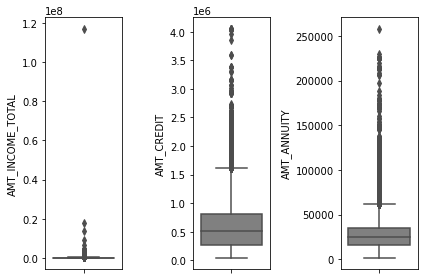

In [10]:
for i in range(0, len(num_df)):
    plt.subplot(1, len(num_df), i+1)
    sns.boxplot(y=df_feature[num_df[i]], color='gray', orient='v')
    plt.tight_layout()

Berdasarkan boxplot di atas, feature-feature numerikal memiliki range perbedaan data yang jauh sehingga memiliki banyak outlier

#### Value Counts

In [11]:
df_feature['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

8,1% dari customer HCI memiliki masalah dalam pembayaran cicilan kredit.

#### Data Correlation

<AxesSubplot:>

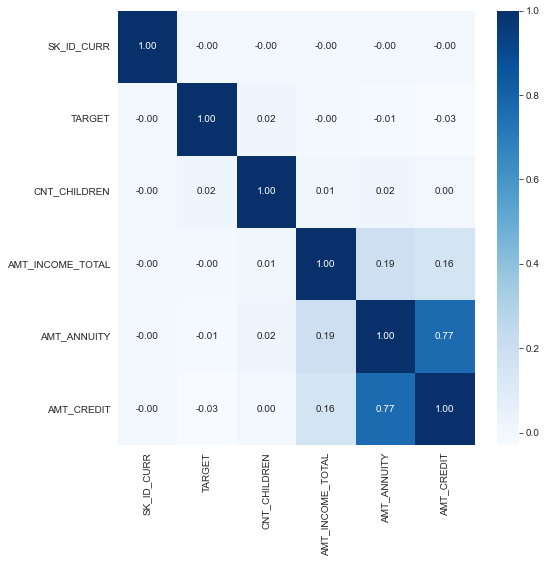

In [116]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_feature.corr(), cmap='Blues', annot=True, fmt='.2f')

Berdasarkan heatmap di atas, dapat dilihat bahwa nilai maksimum korelasi ada yang melebihi 0.7, yaitu 'AMT_CREDIT' dan 'AMT_ANNUITY' yang mana menjustifikasi feature tersebut bersifat redundant sehingga diperlukan drop column untuk kedua feature tersebut.

## Data Cleansing

Tidak terdapat missing values, duplicated data, outlier, imbalance data, dan data redundant pada dataframe.

## Feature Engineering

#### Drop Feature 'AMT_CREDIT' dan 'AMT_ANNUITY'

In [13]:
df_drop1 = df_feature.drop(['AMT_CREDIT'], axis = 1)
df_drop2 = df_drop1.drop(['AMT_ANNUITY'], axis = 1)
df_drop2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL
0,100002,1,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,202500.0
1,100003,0,Cash loans,Married,0,House / apartment,Higher education,State servant,270000.0
2,100004,0,Revolving loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,67500.0
3,100006,0,Cash loans,Civil marriage,0,House / apartment,Secondary / secondary special,Working,135000.0
4,100007,0,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,121500.0


#### Klasifikasi 'AMT_TOTAL_INCOME' Berdasarkan Angka Terdekat

'AMT_TOTAL_INCOME' bersifat numerik dan terdistribusi luas sehingga pengolahan data akan lebih akurat apabila diubah menjadi object sesuai dengan klasifikasinya.

In [40]:
df_drop2['INCOME'] = np.where(df_drop2['AMT_INCOME_TOTAL'] > 500000, '500000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 450000, '450000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 400000, '400000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 350000, '350000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 300000, '300000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 250000, '250000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 200000, '200000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 150000, '150000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 100000, '100000',
                        np.where(df_drop2['AMT_INCOME_TOTAL'] > 50000, '50000', '10000'))))))))))

In [41]:
df_drop2.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,INCOME
0,100002,1,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,202500.0,200000
1,100003,0,Cash loans,Married,0,House / apartment,Higher education,State servant,270000.0,250000
2,100004,0,Revolving loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,67500.0,50000
3,100006,0,Cash loans,Civil marriage,0,House / apartment,Secondary / secondary special,Working,135000.0,100000
4,100007,0,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,121500.0,100000


Drop feature 'AMT_TOTAL_INCOME' karena sudah tidak diperlukan.

In [42]:
df_drop3 = df_drop2.drop(['AMT_INCOME_TOTAL'], axis = 1)
df_drop3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,INCOME
0,100002,1,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,200000
1,100003,0,Cash loans,Married,0,House / apartment,Higher education,State servant,250000
2,100004,0,Revolving loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,50000
3,100006,0,Cash loans,Civil marriage,0,House / apartment,Secondary / secondary special,Working,100000
4,100007,0,Cash loans,Single / not married,0,House / apartment,Secondary / secondary special,Working,100000


Merubah feature 'INCOME' menjadi integer agar dapat diuraikan dalam skala pembuatan plot.

In [43]:
df_drop3['INCOME'] = df_drop3['INCOME'].astype('int64')

Mengubah feature 'SK_ID_CURR' dan'TARGET' menjadi string karena distribusi angka nya kecil, lebih efektif apabila diklasifikasikan dalam beberapa kategori

In [44]:
df_drop3['TARGET'] = df_drop3['TARGET'].astype('str')
df_drop3['SK_ID_CURR'] = df_drop3['SK_ID_CURR'].astype('str')

In [45]:
df = df_drop3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SK_ID_CURR           307511 non-null  object
 1   TARGET               307511 non-null  object
 2   NAME_CONTRACT_TYPE   307511 non-null  object
 3   NAME_FAMILY_STATUS   307511 non-null  object
 4   CNT_CHILDREN         307511 non-null  int64 
 5   NAME_HOUSING_TYPE    307511 non-null  object
 6   NAME_EDUCATION_TYPE  307511 non-null  object
 7   NAME_INCOME_TYPE     307511 non-null  object
 8   INCOME               307511 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 21.1+ MB


<AxesSubplot:xlabel='INCOME', ylabel='Density'>

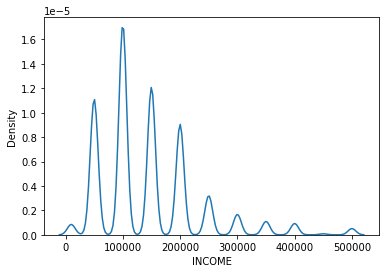

In [46]:
sns.kdeplot(x="INCOME", data=df)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Density'>

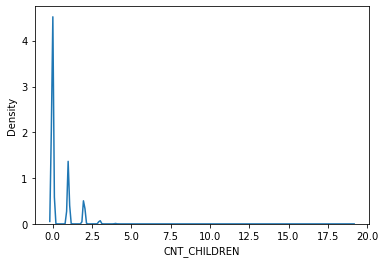

In [47]:
sns.kdeplot(x="CNT_CHILDREN", data=df)

Dataframe "df" adalah dataframe yang akan digunakan dalam kelanjutan pengolahan data dan pemodelan machine learning

#### Standarisasi dan Normalisasi

Standarisasi dan Normalisasi tidak perlu dilakukan karena 'INCOME' merupakan satu-satunya feature yang integer dan terdistribusi negatively skewed.

# STAGE 2

## Pairplot

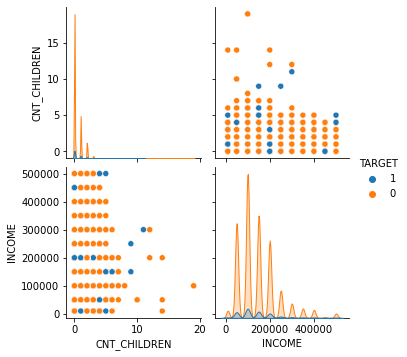

In [52]:
sns.pairplot(df, diag_kind='kde', hue='TARGET')

## Feature Visualization

#### TARGET

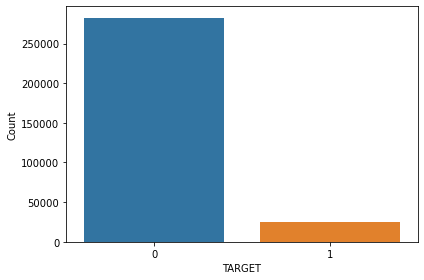

In [31]:
target = df.groupby(['TARGET']).agg({'SK_ID_CURR':['count']}).reset_index()
target.columns = ['TARGET','Count']
sns.barplot(x='TARGET', y='Count', data=target);
plt.tight_layout()

#### NAME_CONTRACT_TYPE

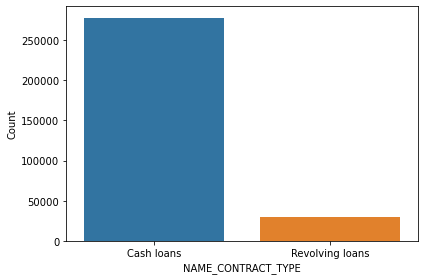

In [32]:
contract = df.groupby(['NAME_CONTRACT_TYPE']).agg({'TARGET':['count']}).reset_index()
contract.columns = ['NAME_CONTRACT_TYPE','Count']
sns.barplot(x='NAME_CONTRACT_TYPE', y='Count', data=contract);
plt.tight_layout()

#### NAME_FAMILY_STATUS

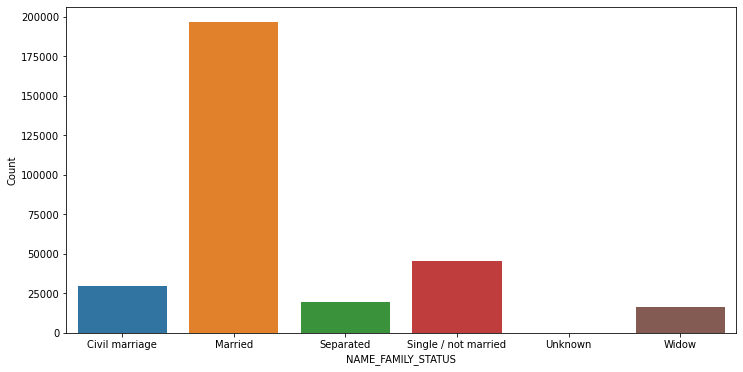

In [33]:
family = df.groupby(['NAME_FAMILY_STATUS']).agg({'TARGET':['count']}).reset_index()
family.columns = ['NAME_FAMILY_STATUS','Count']
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_FAMILY_STATUS', y='Count', data=family);

#### NAME_HOUSING_TYPE

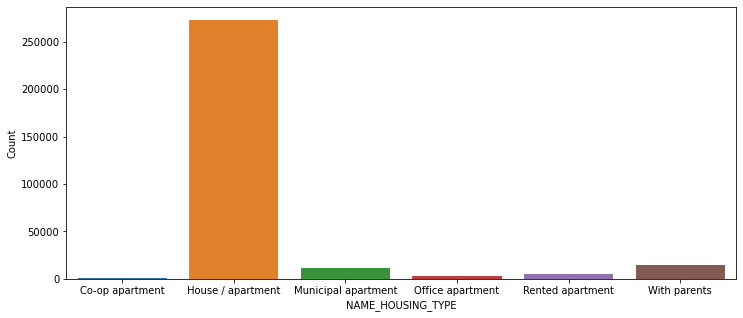

In [34]:
housing = df.groupby(['NAME_HOUSING_TYPE']).agg({'TARGET':['count']}).reset_index()
housing.columns = ['NAME_HOUSING_TYPE','Count']
plt.figure(figsize=(12, 5))
sns.barplot(x='NAME_HOUSING_TYPE', y='Count', data=housing);

#### NAME_EDUCATION_TYPE

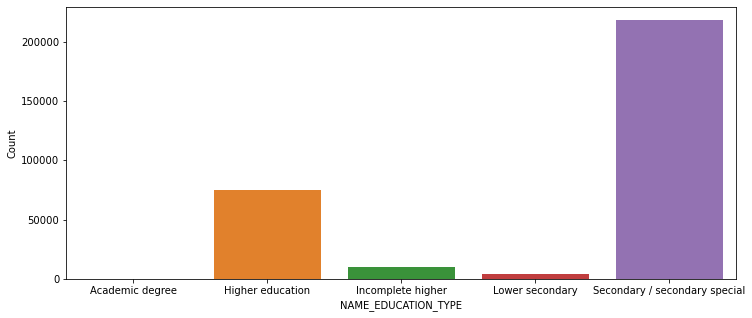

In [35]:
education = df.groupby(['NAME_EDUCATION_TYPE']).agg({'TARGET':['count']}).reset_index()
education.columns = ['NAME_EDUCATION_TYPE','Count']
plt.figure(figsize=(12, 5))
sns.barplot(x='NAME_EDUCATION_TYPE', y='Count', data=education);

#### NAME_INCOME_TYPE

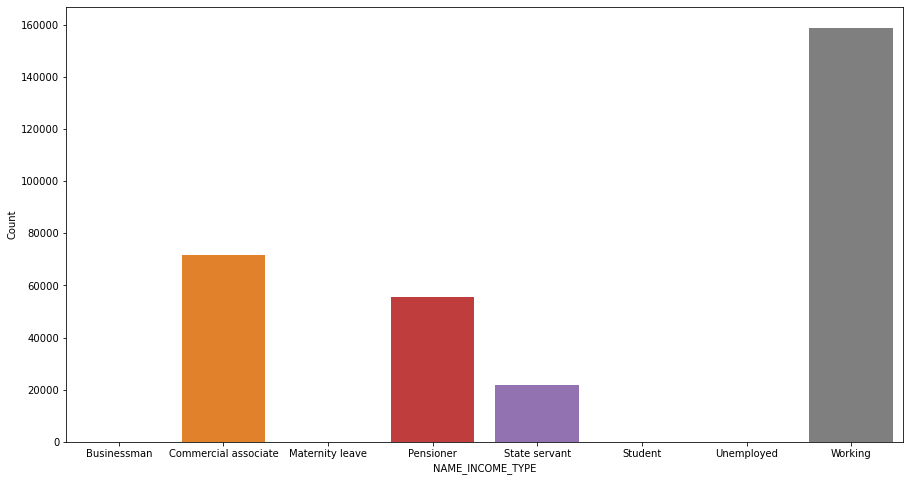

In [36]:
income = df.groupby(['NAME_INCOME_TYPE']).agg({'TARGET':['count']}).reset_index()
income.columns = ['NAME_INCOME_TYPE','Count']
plt.figure(figsize=(15, 8))
sns.barplot(x='NAME_INCOME_TYPE', y='Count', data=income);

#### CNT_CHILDREN

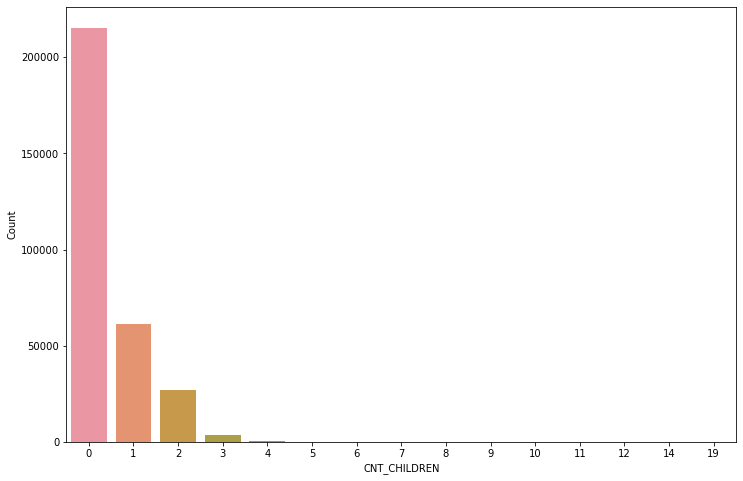

In [48]:
children = df.groupby(['CNT_CHILDREN']).agg({'TARGET':['count']}).reset_index()
children.columns = ['CNT_CHILDREN','Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='CNT_CHILDREN', y='Count', data=children);

#### INCOME

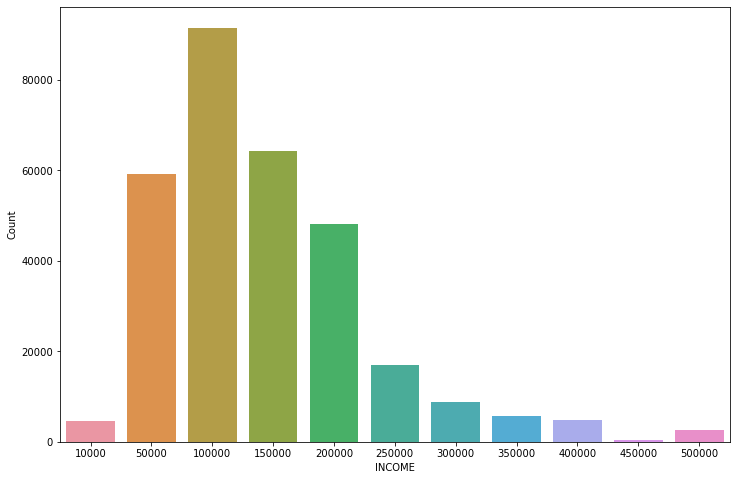

In [50]:
people = df.groupby(['INCOME']).agg({'TARGET':['count']}).reset_index()
people.columns = ['INCOME','Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='INCOME', y='Count', data=people);

## Feature to Label

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SK_ID_CURR           307511 non-null  object
 1   TARGET               307511 non-null  object
 2   NAME_CONTRACT_TYPE   307511 non-null  object
 3   NAME_FAMILY_STATUS   307511 non-null  object
 4   CNT_CHILDREN         307511 non-null  int64 
 5   NAME_HOUSING_TYPE    307511 non-null  object
 6   NAME_EDUCATION_TYPE  307511 non-null  object
 7   NAME_INCOME_TYPE     307511 non-null  object
 8   INCOME               307511 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 21.1+ MB


#### 'NAME_CONTRACT_TYPE' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

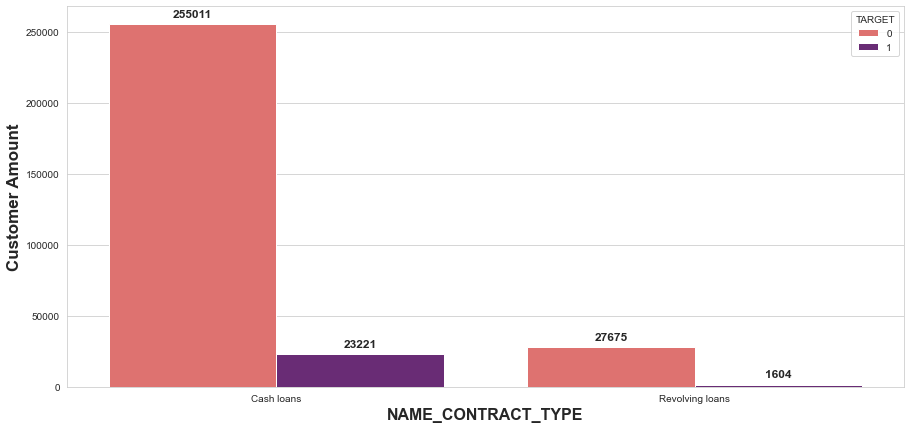

In [55]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
namecontract = df.groupby(['NAME_CONTRACT_TYPE','TARGET']).agg({'TARGET':['count']}).reset_index()
namecontract.columns = ['NAME_CONTRACT_TYPE','TARGET', 'Customer Amount']
a = sns.barplot(x='NAME_CONTRACT_TYPE', y='Customer Amount', hue='TARGET', data=namecontract, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('NAME_CONTRACT_TYPE', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

#### 'NAME_FAMILY_STATUS' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

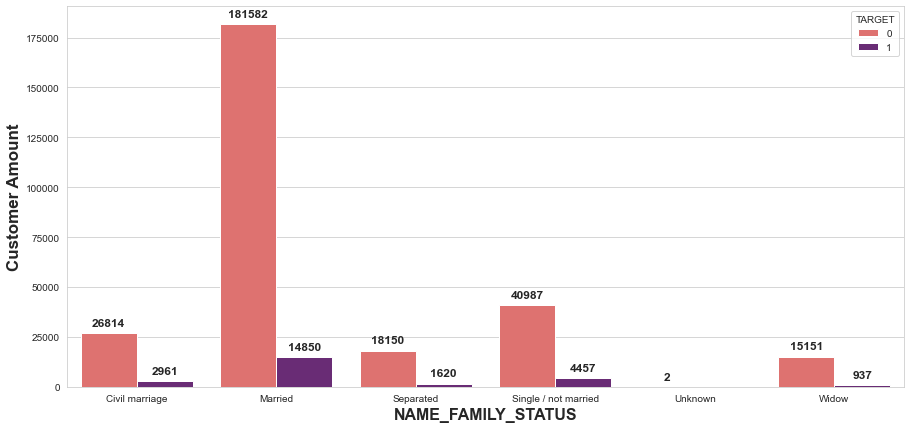

In [58]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
namefamily = df.groupby(['NAME_FAMILY_STATUS','TARGET']).agg({'TARGET':['count']}).reset_index()
namefamily.columns = ['NAME_FAMILY_STATUS','TARGET', 'Customer Amount']
a = sns.barplot(x='NAME_FAMILY_STATUS', y='Customer Amount', hue='TARGET', data=namefamily, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('NAME_FAMILY_STATUS', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

#### 'CNT_CHILDREN' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

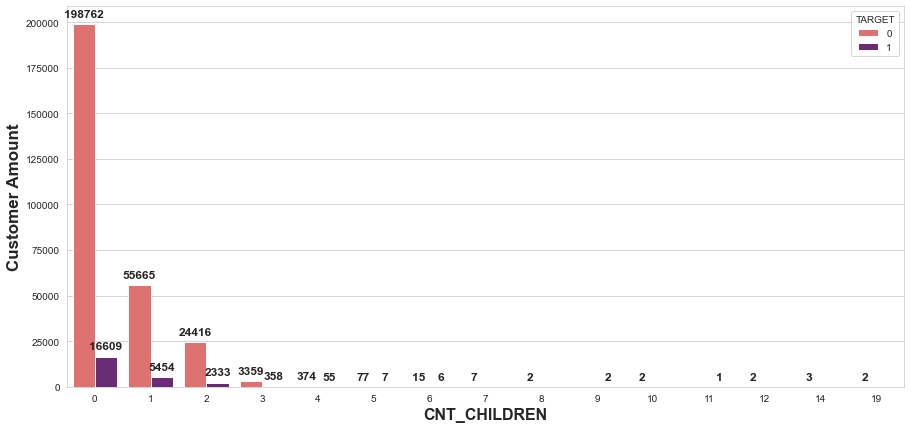

In [59]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
children = df.groupby(['CNT_CHILDREN','TARGET']).agg({'TARGET':['count']}).reset_index()
children.columns = ['CNT_CHILDREN','TARGET', 'Customer Amount']
a = sns.barplot(x='CNT_CHILDREN', y='Customer Amount', hue='TARGET', data=children, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('CNT_CHILDREN', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

#### 'NAME_HOUSING_TYPE' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

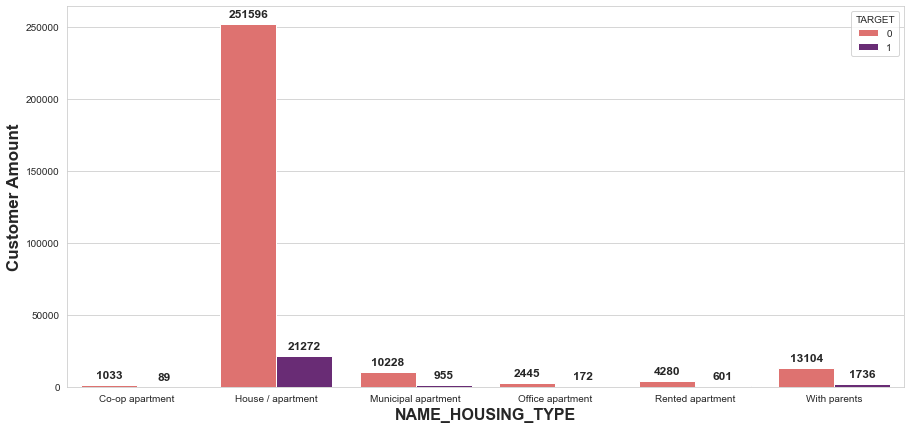

In [60]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
housing = df.groupby(['NAME_HOUSING_TYPE','TARGET']).agg({'TARGET':['count']}).reset_index()
housing.columns = ['NAME_HOUSING_TYPE','TARGET', 'Customer Amount']
a = sns.barplot(x='NAME_HOUSING_TYPE', y='Customer Amount', hue='TARGET', data=housing, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('NAME_HOUSING_TYPE', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

#### 'NAME_EDUCATION_TYPE' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

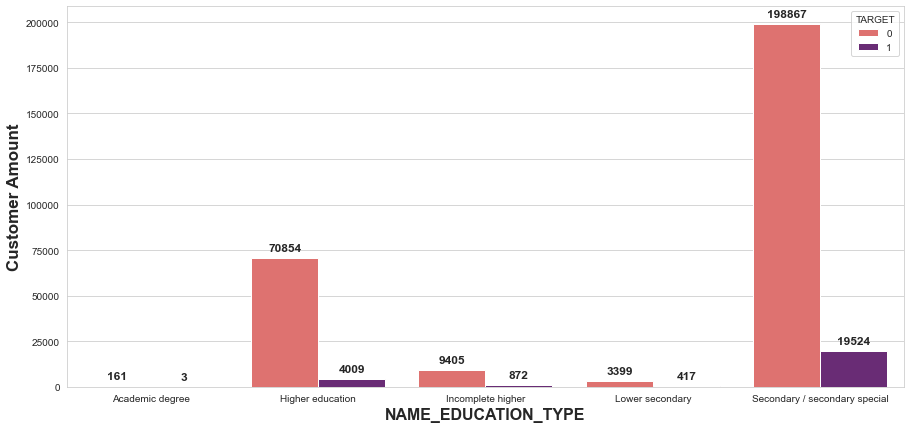

In [61]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
education = df.groupby(['NAME_EDUCATION_TYPE','TARGET']).agg({'TARGET':['count']}).reset_index()
education.columns = ['NAME_EDUCATION_TYPE','TARGET', 'Customer Amount']
a = sns.barplot(x='NAME_EDUCATION_TYPE', y='Customer Amount', hue='TARGET', data=education, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('NAME_EDUCATION_TYPE', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

#### 'NAME_INCOME_TYPE' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

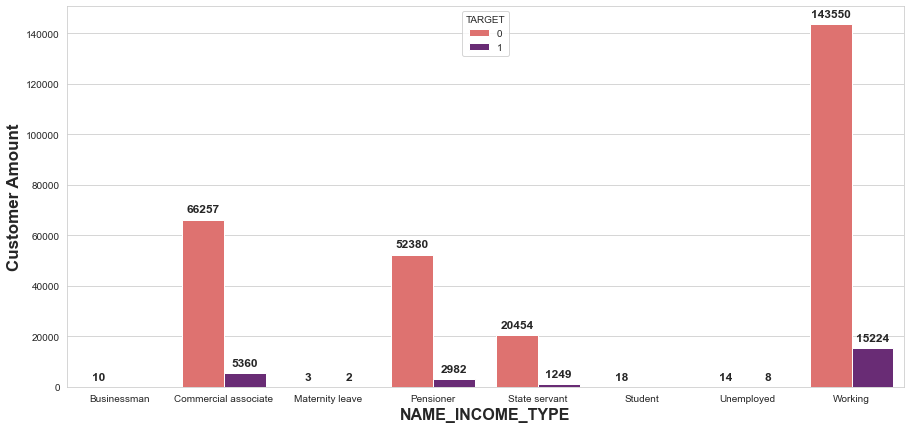

In [62]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
nameincome = df.groupby(['NAME_INCOME_TYPE','TARGET']).agg({'TARGET':['count']}).reset_index()
nameincome.columns = ['NAME_INCOME_TYPE','TARGET', 'Customer Amount']
a = sns.barplot(x='NAME_INCOME_TYPE', y='Customer Amount', hue='TARGET', data=nameincome, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('NAME_INCOME_TYPE', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

#### 'INCOME' to 'TARGET'

Text(0, 0.5, 'Customer Amount')

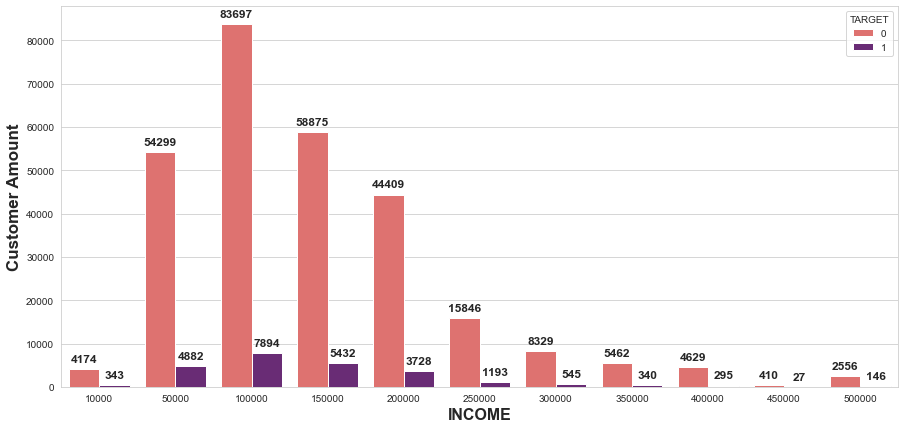

In [63]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
income = df.groupby(['INCOME','TARGET']).agg({'TARGET':['count']}).reset_index()
income.columns = ['INCOME','TARGET', 'Customer Amount']
a = sns.barplot(x='INCOME', y='Customer Amount', hue='TARGET', data=income, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('INCOME', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

<b>Kesimpulan: Customer yang memiliki kesulitan dalam pembayaran (TARGET = 1) rata-rata:
1. Contract kredit yang diambil adalah Cash Loans
2. Married, hal ini diprediksi terjadi karena lebih biaya hidup lebih tinggi dibanding yang status-nya Single
3. Memiliki House / Apartment, hal ini diprediksi terjadi karena kemungkinan customer masih membayar cicilan pelunasan rumah / apartemen
4. Berpendidikan menengah (SMA), angkatan kerja, dan rata-rata penghasilan 100,000

# STAGE 3

## Logistic Regression

In [82]:
df_mod = df.copy()

In [93]:
a = df_mod.drop(columns=['TARGET'])
b = a.drop(columns=['NAME_CONTRACT_TYPE'])
c = b.drop(columns=['NAME_FAMILY_STATUS'])
d = c.drop(columns=['NAME_HOUSING_TYPE'])
e = d.drop(columns=['NAME_EDUCATION_TYPE'])
x = e.drop(columns=['NAME_INCOME_TYPE'])
y = df_mod['TARGET'] # target / label

In [96]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### Melatih Model pada Data Train

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

#### Prediksi pada Test (Pre-Tunning)

In [98]:
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [99]:
#untuk menghitung AUC 
y_pred_proba = lr.predict_proba(x_test)
y_pred_proba

array([[0.96729155, 0.03270845],
       [0.91876573, 0.08123427],
       [0.88300593, 0.11699407],
       ...,
       [0.96660086, 0.03339914],
       [0.95293012, 0.04706988],
       [0.90948782, 0.09051218]])

#### Evaluation Pre-Tunning

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [104]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92


Jika dilihat dari metrics evaluasi Accuracy yang didapatkan adalah 0.92. Sedangkan Precision dan Recall tidak dapat dinilai karena feature memiliki lebih dari 2 probabilitas.

In [106]:
print('auc_score pada y_pred: ', roc_auc_score(y_test, y_pred))
print('auc_score pada y_pred_proba: ',roc_auc_score(y_test, y_pred_proba[:, 1]))

auc_score pada y_pred:  0.5
auc_score pada y_pred_proba:  0.515121900612166


Nilai auc_score pada hasil prediksi hasil maupun hasil prediksi nilai probabilitasnya, keduanya menunjukkan hasil kurang dari 0.95, dimana bisa disimpulkan bahwa dataset memiliki tingkat linearitas yang tidak begitu tinggi. Selanjutnya akan dilakukan Regularization & Hyperparameter Tunning untuk mengetahui performa lebih lanjut dari model. Hal ini didukung dengan visualisasi menggunakan pairplot seperti yang sebelumnya sudah tervisualisasi pada stage 2, bahwa tidak terlihat adanya feature yang memiliki linearitas yang tinggi atau tidak terlihat pola terpisah pada warna yang berbeda dari representasi kondisi Target.

#### Regularization & Hyperparameter Tuning

In [107]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l2']
C = [0.1]
hyperparameters = dict(penalty=penalty, C=C)

#tunning
lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparameters, cv=10, scoring='recall', random_state=42)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1], 'penalty': ['l2']},
                   random_state=42, scoring='recall')

In [108]:
print('Best penalty:', rs.best_estimator_.get_params()['penalty'])
print('Best C:', rs.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.1


Berdasarkan best_estimator didapatkan metode regularization paling baik menggunakan l2 Norm(Ridge Regression), hal ini sesuai dengan banyak feature yang berkaitan dengan target. Kemudian dihasilkan nilai C terbaik adalah 0.1. Selanjutnya akan dilakukan prediksi kembali setelah kondisi tunning.

#### Predict (After-Tunning)

In [109]:
y_pred_tun = rs.predict(x_test)
y_pred_tun_train = rs.predict(x_train)
y_pred_tun_proba = rs.predict_proba(x_test)

#### Evaluation (After-Tuning)

In [111]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_tun))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_tun_train))

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92


In [112]:
print('auc_score pada y_pred_tun: ', roc_auc_score(y_test, y_pred_tun))
print('auc_score pada y_pred_tun_proba: ',roc_auc_score(y_test, y_pred_tun_proba[:, 1]))

auc_score pada y_pred_tun:  0.5
auc_score pada y_pred_tun_proba:  0.515121900612166


Setelah dilakukan Hyperparameter Tunning terlihat adanya peningkatan pada AUC score yang dihasilkan sebanyak 0.015 menjadi 0.515. Oleh karena itu dapat disimpulkan pemodelan pada dataset kasus ini memiliki performa yang kurang maksimal jika menerapkan algortima Logistic Regression. Walaupun demikian, data ini masih dapat dipakai untuk membuat rekomendasi bisnis.